# MULTIPLE LINEAR REGRESSION FOR STOCK PRICE PREDICTION

Stock price prediction is an essential task for investors and traders, as it can provide useful insights for making profitable trading decisions. One of the methods used for stock price prediction is multiple linear regression. Multiple linear regression is a statistical technique that analyzes the relationship between a dependent variable, which is the variable to be predicted (in this case, the close price of the stock), and multiple independent variables (such as trading volume, open price, low price and high price, etc.). The method finds the best-fit linear equation that describes the relationship between the variables, which can then be used to predict the stock price for future periods. In this way, multiple linear regression can provide a useful tool for investors and traders looking to make informed decisions about when to buy or sell stocks. However, it's important to note that stock prices are subject to various external factors, and no method can provide perfectly accurate predictions.

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from sklearn import metrics

/Users/teja/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Importing the dataset from yfinance
AAPL = yf.Ticker("AAPL")
# Getting all time stock data 
AAPL = AAPL.history(period = "max")
# Getting the first 5 data
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.0,0.0


In [3]:
# Getting the last 5 data
AAPL.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900,0.0,0.0
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700,0.0,0.0
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000,0.0,0.0
2023-05-04 00:00:00-04:00,164.889999,167.039993,164.309998,165.789993,81235400,0.0,0.0
2023-05-05 00:00:00-04:00,170.979996,174.300003,170.759995,173.570007,113316400,0.0,0.0


In [4]:
# Creating a copy of the Apple dataframe from a specific date
AAPL = AAPL.loc["2000-01-01":].copy()

In [5]:
# Shape of the dataframe
AAPL.shape

(5873, 7)

In [6]:
# Information of the Apple Dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5873 entries, 2000-01-03 00:00:00-05:00 to 2023-05-05 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5873 non-null   float64
 1   High          5873 non-null   float64
 2   Low           5873 non-null   float64
 3   Close         5873 non-null   float64
 4   Volume        5873 non-null   int64  
 5   Dividends     5873 non-null   float64
 6   Stock Splits  5873 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 367.1 KB


In [7]:
# Statistics of the Apple dataframe
AAPL.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5873.000000,5873.000000,5873.000000,5873.000000,5.873000e+03,5873.000000,5873.000000
mean,30.519552,30.868356,30.183767,30.540789,4.092381e+08,0.001197,0.002554
std,45.149917,45.705982,44.632430,45.195706,3.865421e+08,0.014437,0.111469
min,0.197429,0.200469,0.193326,0.199405,3.519590e+07,0.000000,0.000000
25%,1.686431,1.718955,1.661809,1.691598,1.372808e+08,0.000000,0.000000
50%,11.590105,11.690108,11.480367,11.556664,2.908976e+08,0.000000,0.000000
75%,35.825716,36.124921,35.348672,35.899010,5.460812e+08,0.000000,0.000000
max,181.299361,181.607100,177.814925,180.683868,7.421641e+09,0.230000,7.000000


In [8]:
# Columns of the dataframe
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

# Data Cleaning and Visualization of the Apple stock

In [9]:
# Deleting the columns which are not required
del AAPL["Dividends"]
del AAPL["Stock Splits"]

In [10]:
# New AAPL Dataframe
AAPL

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03 00:00:00-05:00,0.796973,0.854918,0.772751,0.850643,535796800
2000-01-04 00:00:00-05:00,0.822621,0.840669,0.768951,0.778926,512377600
2000-01-05 00:00:00-05:00,0.788424,0.840194,0.782725,0.790324,778321600
2000-01-06 00:00:00-05:00,0.806473,0.813122,0.721931,0.721931,767972800
2000-01-07 00:00:00-05:00,0.733329,0.767526,0.725731,0.756127,460734400
...,...,...,...,...,...
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000


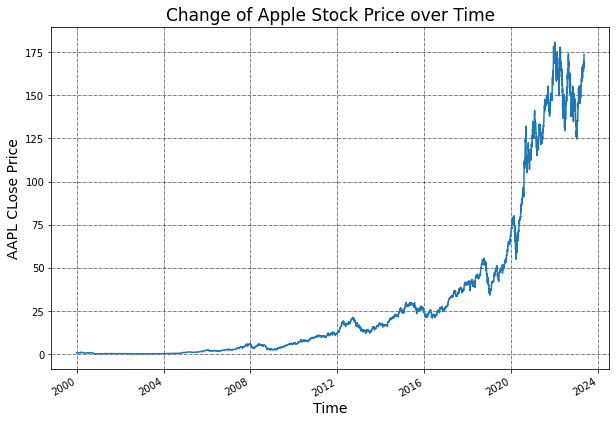

In [11]:
# Plotting the Closing Stock Price Data of Apple over Time
AAPL['Close'].plot(figsize=(10, 7))
plt.title("Change of Apple Stock Price over Time", fontsize=17)
plt.ylabel('AAPL CLose Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

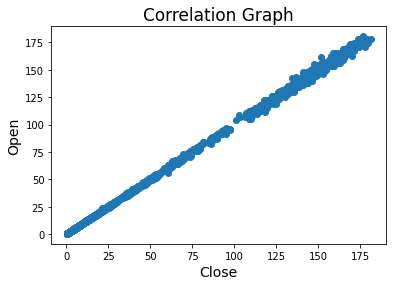

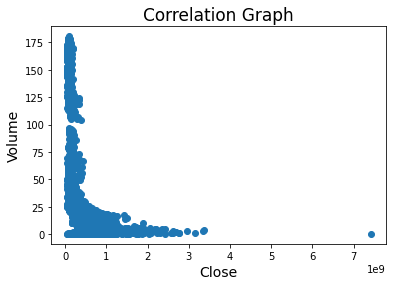

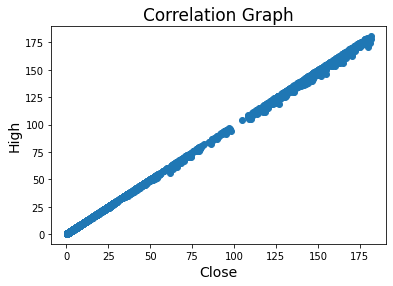

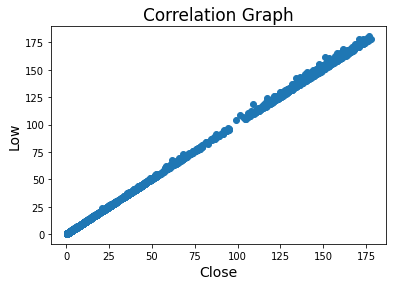

In [12]:
# Plotting the correlation graphs between the predictors and the Closing price
predictors = ['Open','Volume','High','Low']
for col in predictors:
    X = AAPL[col]
    Y = AAPL['Close']
    plt.scatter(X,Y)
    plt.title("Correlation Graph", fontsize=17)
    plt.ylabel(f'{col}', fontsize=14)
    plt.xlabel('Close', fontsize=14)
    plt.show()

We can observe that there exists a positive correlation between the predictors Open, High, Low, and the target variable Close.

In [13]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close'], axis = 1)
    target = df_Stock['Close']
    
    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

'Close' is the column that we are trying to predict here which is the price for the next day.

In [14]:
# Implementing the function to get the following data
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(AAPL)

Historical Stock Data length is -  5873
Training Set length -  5168
Validation Set length -  587
Test Set length -  117
(5168, 4) (587, 4) (118, 4)
(5168,) (587,) (118,)


# Implementation of the Linear Regression Algorithm

In [15]:
# Import the Linear Regression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# Creating an instance of the Linear Regression class
lr = LinearRegression()
# Training the linear regression model using the fit() method
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Slope and Intercept of the Regression line
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-5.63290695e-01  7.53980858e-01  8.10183271e-01  1.07381881e-11]
LR Intercept: 
 -0.004271163676813572


In [17]:
print("Performance (R^2): ", lr.score(X_train, Y_train))
print("Percentage (R^2): ", (lr.score(X_train, Y_train))*100)

Performance (R^2):  0.999916738741321
Percentage (R^2):  99.9916738741321


R-squared (R²) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model.In general, the higher the R² value, the better the model fits the data.

In [18]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Mean absolute percentage error (MAPE) is a metric used to evaluate the accuracy of a forecasting model. It measures the average percentage difference between the actual values and the predicted values.

In [19]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

We are using a trained linear regression model lr to make predictions on the three sets of input data: X_train, X_val, and X_test. Specifically, the predict() method of the linear regression model is used to predict the corresponding target values for each set of input data.

In [20]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.68
Training Mean Squared Error: 0.03
Training RMSE:  0.17
Training MAE:  0.07
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.57
Validation Mean Squared Error: 0.03
Validation RMSE:  1.06
Validation MAE:  0.8
 
Test R-squared:  0.99
Test Explained Variation:  0.99
Test MAPE: 0.5
Test Mean Squared Error: 0.79
Test RMSE:  0.89
Test MAE:  0.74


1.The R-squared value is a measure of how well the model fits the data and ranges from 0 to 1, with higher values indicating a better fit.

2.The explained variance score is another measure of how well the model fits the data and also ranges from 0 to 1, with higher values indicating a better fit.

3.MAPE measures the percentage difference between the predicted and actual values, and lower values indicate better performance.

4.MSE measures the average squared difference between the predicted and actual values, and lower values indicate better performance.

5.RMSE is the square root of the MSE and is another measure of the average difference between the predicted and actual values, with lower values indicating better performance.

6.MAE measures the average absolute difference between the predicted and actual values, with lower values indicating better performance.

In [21]:
# Create a new dataframe with columns 'Actual' and 'Predicted' with values Y_val and Y_val_pred
df_pred_val = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred_val['Predicted'] = Y_val_pred
# Reset the index of the dataframe to add a new column 'Date' and converting it to datetime format
df_pred_val = df_pred_val.reset_index()
df_pred_val.loc[:, 'Date'] = pd.to_datetime(df_pred_val['Date'],format='%Y-%m-%d')
df_pred_val

,Date,Actual,Predicted
0,2020-07-20 00:00:00-04:00,96.701126,96.134243
1,2020-07-21 00:00:00-04:00,95.366486,95.706260
2,2020-07-22 00:00:00-04:00,95.634384,96.022878
3,2020-07-23 00:00:00-04:00,91.281464,91.531736
4,2020-07-24 00:00:00-04:00,91.055344,89.533074
...,...,...,...
582,2022-11-08 00:00:00-05:00,139.287338,138.720853
583,2022-11-09 00:00:00-05:00,134.664383,135.280827
584,2022-11-10 00:00:00-05:00,146.646088,143.975721
585,2022-11-11 00:00:00-05:00,149.471771,147.702974


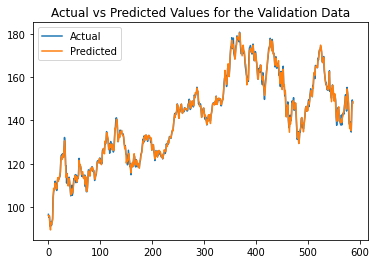

In [22]:
# Plot Model Predicted Prices vs Actual Prices on Time Series plot for the Validation Data
df_pred_val[['Actual', 'Predicted']].plot()

# Set the title of the plot
plt.title('Actual vs Predicted Values for the Validation Data')

# Display the plot
plt.show()

In [23]:
# Create a new dataframe with columns 'Actual' and 'Predicted' with values Y_test and Y_test_pred
df_pred_test = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
df_pred_test['Predicted'] = Y_test_pred
# Reset the index of the dataframe to add a new column 'Date' and converting it to datetime format
df_pred_test = df_pred_test.reset_index()
df_pred_test.loc[:, 'Date'] = pd.to_datetime(df_pred_test['Date'],format='%Y-%m-%d')
df_pred_test

,Date,Actual,Predicted
0,2022-11-15 00:00:00-05:00,149.811249,150.188001
1,2022-11-16 00:00:00-05:00,148.563156,148.097738
2,2022-11-17 00:00:00-05:00,150.490234,149.906356
3,2022-11-18 00:00:00-05:00,151.059357,150.607836
4,2022-11-21 00:00:00-05:00,147.784348,148.242646
...,...,...,...
113,2023-05-01 00:00:00-04:00,169.589996,169.787785
114,2023-05-02 00:00:00-04:00,168.539993,168.364880
115,2023-05-03 00:00:00-04:00,167.449997,168.819301
116,2023-05-04 00:00:00-04:00,165.789993,166.181767


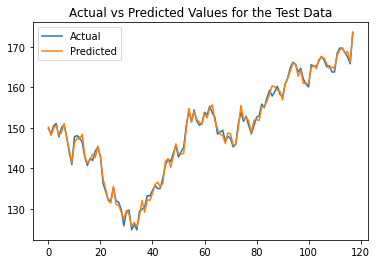

In [24]:
# Plot Model Predicted Prices vs Actual Prices on Time Series plot for the Test Data
df_pred_test[['Actual', 'Predicted']].plot()

# Set the title of the plot
plt.title('Actual vs Predicted Values for the Test Data')

# Display the plot
plt.show()